In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus= False)


In [2]:
import pandas as pd
df = pd.read_csv('data/score.csv')
df['학년'] = [3, 3, 2, 1, 1, 3, 2, 2]
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기,학년
0,1번,채치수,북산고,197,90,85,100,95,85,Python,3
1,2번,정대만,북산고,184,40,35,50,55,25,Java,3
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript,2
3,4번,서태웅,북산고,187,40,60,70,75,80,Java,1
4,5번,강백호,북산고,188,15,20,10,35,10,Java,1
5,6번,변덕규,능남고,202,80,100,95,85,80,C#,3
6,7번,황태산,능남고,188,55,65,45,40,35,Python,2
7,8번,윤대협,능남고,190,100,85,90,95,95,C#,2


In [3]:
group = df.groupby('SW특기').size()
group

SW특기
C#            2
Java          3
Javascript    1
Python        2
dtype: int64

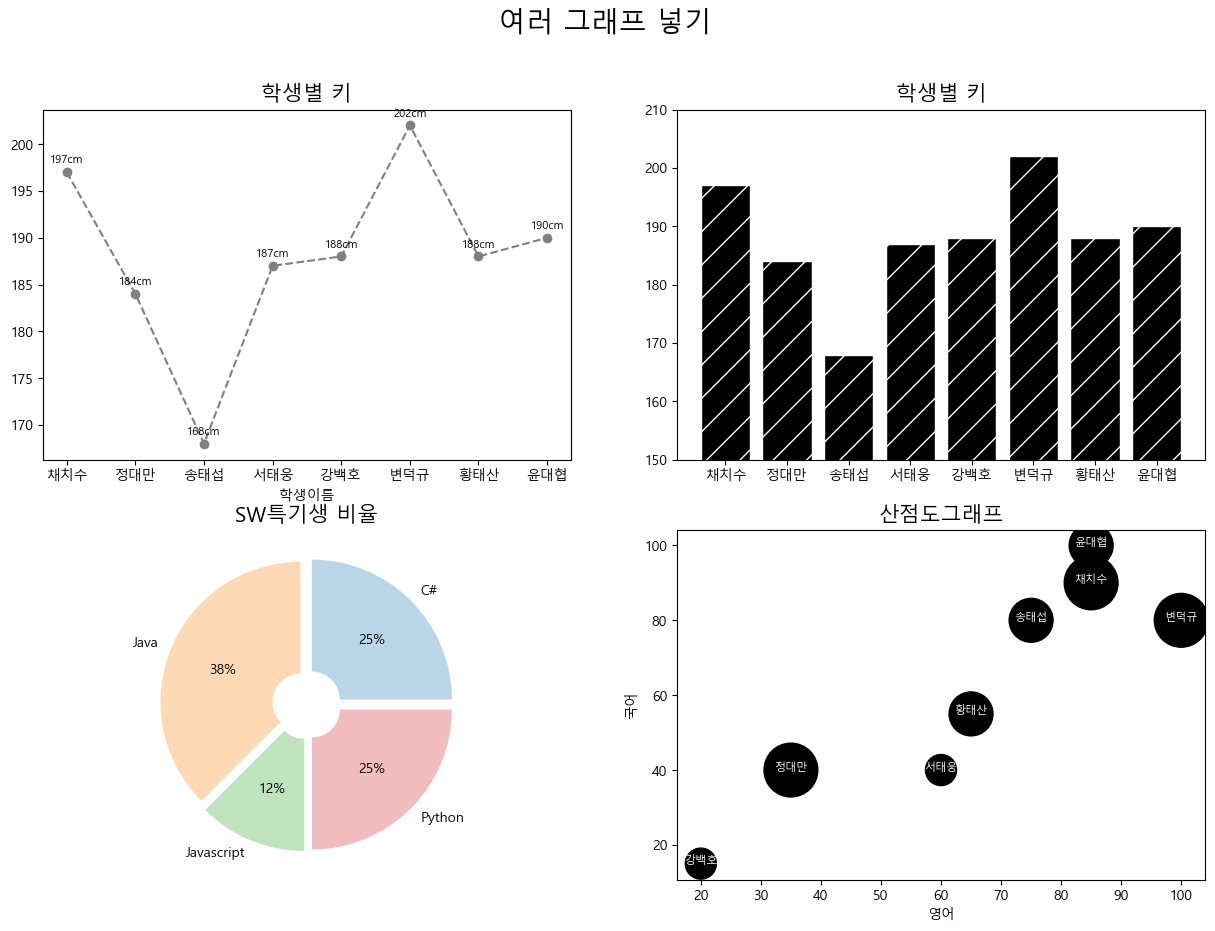

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('여러 그래프 넣기', size=20)

#첫번째 그래프
axs1 = axs[0,0]
axs1.plot(df['이름'],df['키'], color= 'gray', marker='o', ls='--')
axs1.set_title('학생별 키', size=15)
axs1.set_xlabel('학생이름')
for idx in range(len(df)):
    x = idx
    y = df.loc[idx, '키']
    text = f'{y}cm'
    axs1.text(x, y+1, text, size=8, ha='center')

#두번째그래프
axs2 = axs[0,1]
axs2.set_title('학생별 키', size=15)
axs2.bar(df['이름'], df['키'], color='black', hatch='/', edgecolor='white')
axs2.set_ylim(150,210)

#세번째 그래프
axs3 = axs[1,0]
axs3.set_title('SW특기생 비율', size=15)
group = df.groupby('SW특기').size()
axs3.pie(group.values, labels = group.index, autopct='%.0f%%', 
         explode=[0.05]*len(group), wedgeprops={'width':0.8, 'alpha':0.3})

#네번째 그래프
axs4 = axs[1,1]
axs4.set_title('산점도그래프', size=15)
axs4.scatter(df['영어'], df['국어'], color='black', sizes= df['학년'] * 500)
axs4.set_xlabel('영어')
axs4.set_ylabel('국어')
for idx in range(len(df)):
    y = df.loc[idx, '국어']
    x = df.loc[idx, '영어']
    text = df.loc[idx, '이름']
    axs4.text(x, y, text, ha='center', size=8, color='white')
plt.show()